<a href="https://colab.research.google.com/github/UknowYunmo/Image-Processing/blob/main/04-OpenCV_%EC%82%AC%EC%9D%B4%EC%A6%88%EB%B3%80%EA%B2%BD_%ED%9A%8C%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving images.jfif to images.jfif


지금까지 이미지가 numpy 행렬로 나타내어진다는 것은 확실히 알았음.

근데 만약 이미지를 확대한다면, 그 픽셀에 해당하는 행렬의 요소값은 어떻게 변할까?

없던 공간에서 요소값들이 새로 생겨나지만 나타나는 이미지는 어색하지 않아야한다.

이렇게 어색하지 않게끔 그 빈 공간에 픽셀을 채우는 것이 Interpolation(보간법)이다.

보간법의 종류에는 1D nearest-neighbour, 2D nearest-neighbor, Linear, Billnear, Cubic, Bicubic이 있다.

In [ ]:
cv2.resize(image,dsize,fx,fy,interpolation) # 이미지 크기 조절

- dsize : Manual Size
- fx : 가로 비율
- fy : 세로 비율
- interpolation : 보간법

INTER_CUBIC : 사이즈를 크게할 때 주로 사용

INTER_AREA : 사이즈를 작게할 때 주로 사용

하지만 사이즈의 엄청 큰 변화를 주는 경우 어떤 알고리즘을 사용하더라도 한계가 있으니 유의하자

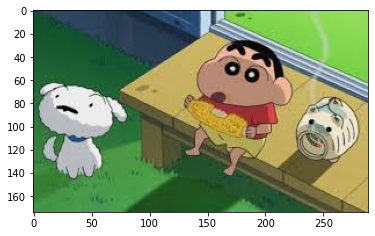

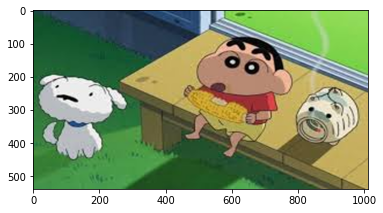

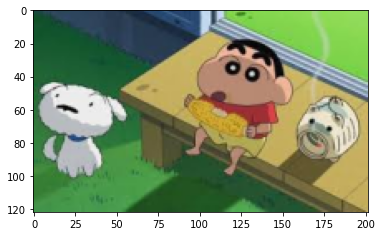

In [25]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('images.jfif')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

expand=cv2.resize(image,None,fx=3.5,fy=3.1,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

shrink=cv2.resize(image,None,fx=0.7,fy=0.7,interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()

변환 행렬은


[M11 M12 M13]

[M21 M22 M23]

요런 느낌으로 생겼는데

이걸 이미지 상의 모든 좌표 (a,b)와 연산하게 되면

(a,b) 좌표는

(M11*a + M12*b + M13 , M21*a + M22*b + M23) 이 된다.


예시 :

변동행렬

[1 0 x]

[1 0 y]

일 때 (a,b) 는 전부

(a+x ,b+y)로 바뀐다.

그리고 이는, 기존 (a,b) 에서 x축이 x만큼, y축이 y만큼 증가한 것이다. -> 이미지 상으로는 반대로 이동 (직접 해보면 느낌옴)

In [ ]:
cv2.warpAffine(image,M,dsize) # 이미지의 위치를 변경하는 함수

# M : 변환 행렬
# dsize : Manual Size

(174, 289, 3)
174
289


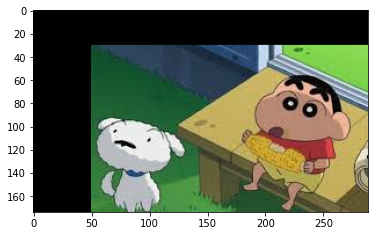

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread('images.jfif')

print(image.shape)
height,width=image.shape[:2]
print(height)
print(width)

M=np.float32([[1,0,50],[0,1,30]]) # x축 50, y축 30 이동하게 하는 변환행렬
moved=cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(moved,cv2.COLOR_BGR2RGB))
plt.show() 

In [ ]:
cv2.getRotationMatrix2D(center,angle,scale)
# center : 회전 중심
# angle : 회전 각도
# scale : Scale Factor (크기)

# 회전시키는 변환 행렬은 sin, cos 들어가서 어지럽다..
# 하지만 getRotationMatrix2D 함수가 변환 행렬을 만들어준다 ^^

(174, 289, 3)
174
289


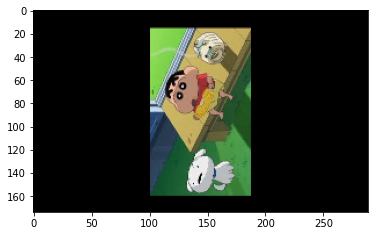

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread('images.jfif')

print(image.shape)
height,width=image.shape[:2]
print(height)
print(width)

M=cv2.getRotationMatrix2D((width/2,height/2),90,0.5)
# width, weight를 반으로 잘랐으니 중심점이 되고, 90도 회전하라고 지정, 크기는 0.5로 줄여라
turned=cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(turned,cv2.COLOR_BGR2RGB))
plt.show() 